In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA


In [3]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Step 2A: KMeans Clustering
# Brief Description:
# KMeans clustering partitions the data into k clusters by minimizing the within-cluster variance.
# It is iterative and updates cluster centroids until convergence.

# Applying KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
# Visualization with PCA for KMeans
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


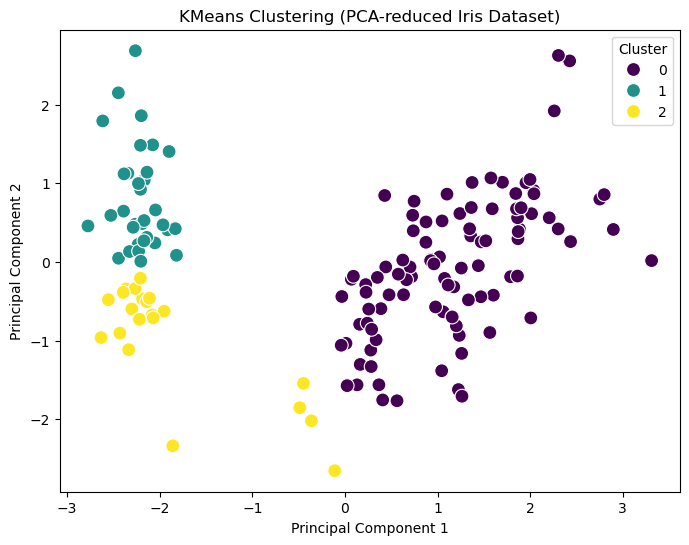

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title('KMeans Clustering (PCA-reduced Iris Dataset)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [13]:
# Explanation:
# - KMeans is suitable for the Iris dataset as it naturally clusters into three groups corresponding to species.

# Step 2B: Hierarchical Clustering
# Brief Description:
# Hierarchical clustering creates a dendrogram to represent data points merged into clusters iteratively.
# It works well for datasets with a natural hierarchy.

In [15]:
# Applying Hierarchical Clustering
linked = linkage(X_scaled, method='ward')


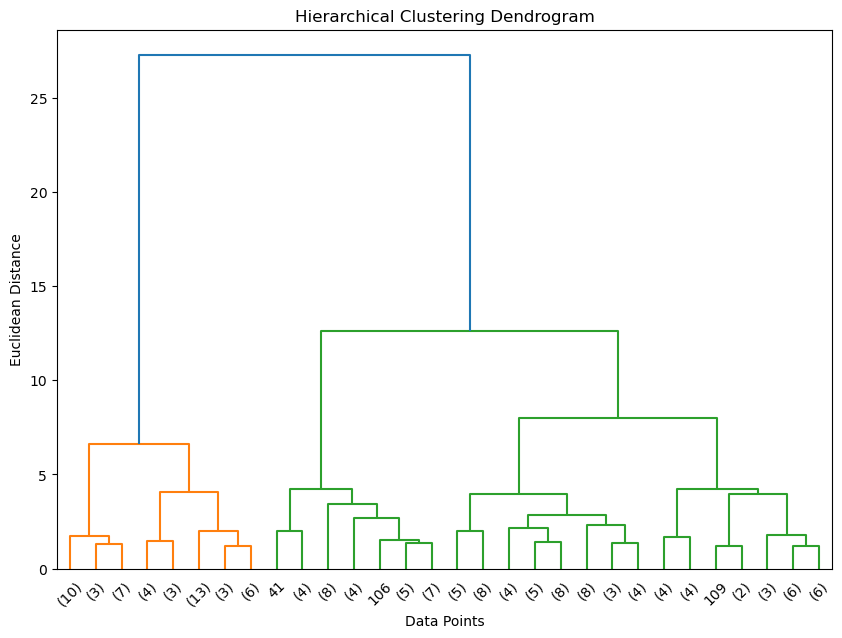

In [17]:
# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=30, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [19]:
# Assigning cluster labels
hierarchical_labels = fcluster(linked, t=3, criterion='maxclust')


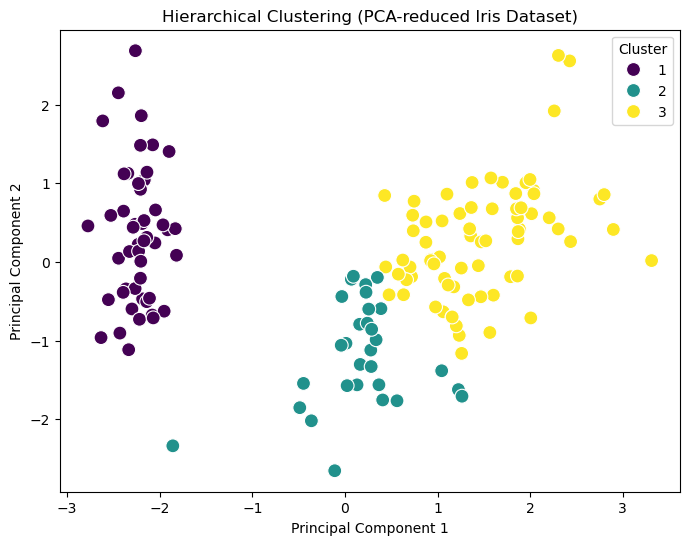

In [21]:
# Visualization with PCA for Hierarchical Clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hierarchical_labels, palette='viridis', s=100)
plt.title('Hierarchical Clustering (PCA-reduced Iris Dataset)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Explanation:
# - Hierarchical clustering is suitable for the Iris dataset because it allows for visualizing the hierarchy of clusters.
# - It provides insights into the number of clusters by analyzing the dendrogram.
